# Random Forest

Ahora este será un ejemplo de cómo usar Random Forest en un problema de clasificación. Usaremos el conjunto de datos de una ruta basado en tiempo y distancia para predecir si se debe o no aceptar un viaje.

In [2]:
# Instalación de librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Importación de librerías
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [4]:
# Importación de datos
datos = pd.read_csv('./assets/dataset1.csv', delimiter=',')
datos.head(5)

,Ruta,Empresa,Tiempo,Distancia,Prisa,Decision Abordar
0,0,0,20,5,1,1
1,1,1,30,10,1,0
2,0,0,10,15,1,1
3,2,2,20,10,0,1
4,1,1,20,5,1,1


In [5]:
# Describir los datos
datos.describe()

,Ruta,Empresa,Tiempo,Distancia,Prisa,Decision Abordar
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.000000,0.714286,20.000000,12.857143,0.857143,0.571429
std,0.816497,0.755929,8.164966,8.591247,0.377964,0.534522
min,0.000000,0.000000,10.000000,5.000000,0.000000,0.000000
25%,0.500000,0.000000,15.000000,7.500000,1.000000,0.000000
50%,1.000000,1.000000,20.000000,10.000000,1.000000,1.000000
75%,1.500000,1.000000,25.000000,15.000000,1.000000,1.000000
max,2.000000,2.000000,30.000000,30.000000,1.000000,1.000000


In [6]:
# Obtener información de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Ruta              7 non-null      int64
 1   Empresa           7 non-null      int64
 2   Tiempo            7 non-null      int64
 3   Distancia         7 non-null      int64
 4   Prisa             7 non-null      int64
 5   Decision Abordar  7 non-null      int64
dtypes: int64(6)
memory usage: 468.0 bytes


In [9]:
# Preparar los datos
X = datos.drop(columns=['Decision Abordar'])
y = datos['Decision Abordar']

In [19]:
# Modelo de Random Forest con el uso de entropía
clf = tree.DecisionTreeClassifier(max_leaf_nodes=4, random_state=0, criterion='entropy')
clf = clf.fit(X, y)

[Text(0.6, 0.8333333333333334, 'x[2] <= 25.0\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(0.4, 0.5, 'x[3] <= 22.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

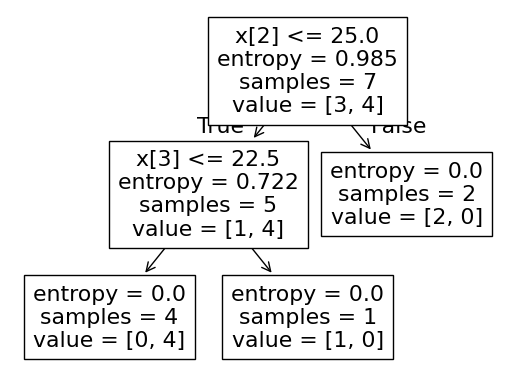

In [20]:
# Imprimir el arbol
tree.plot_tree(clf)


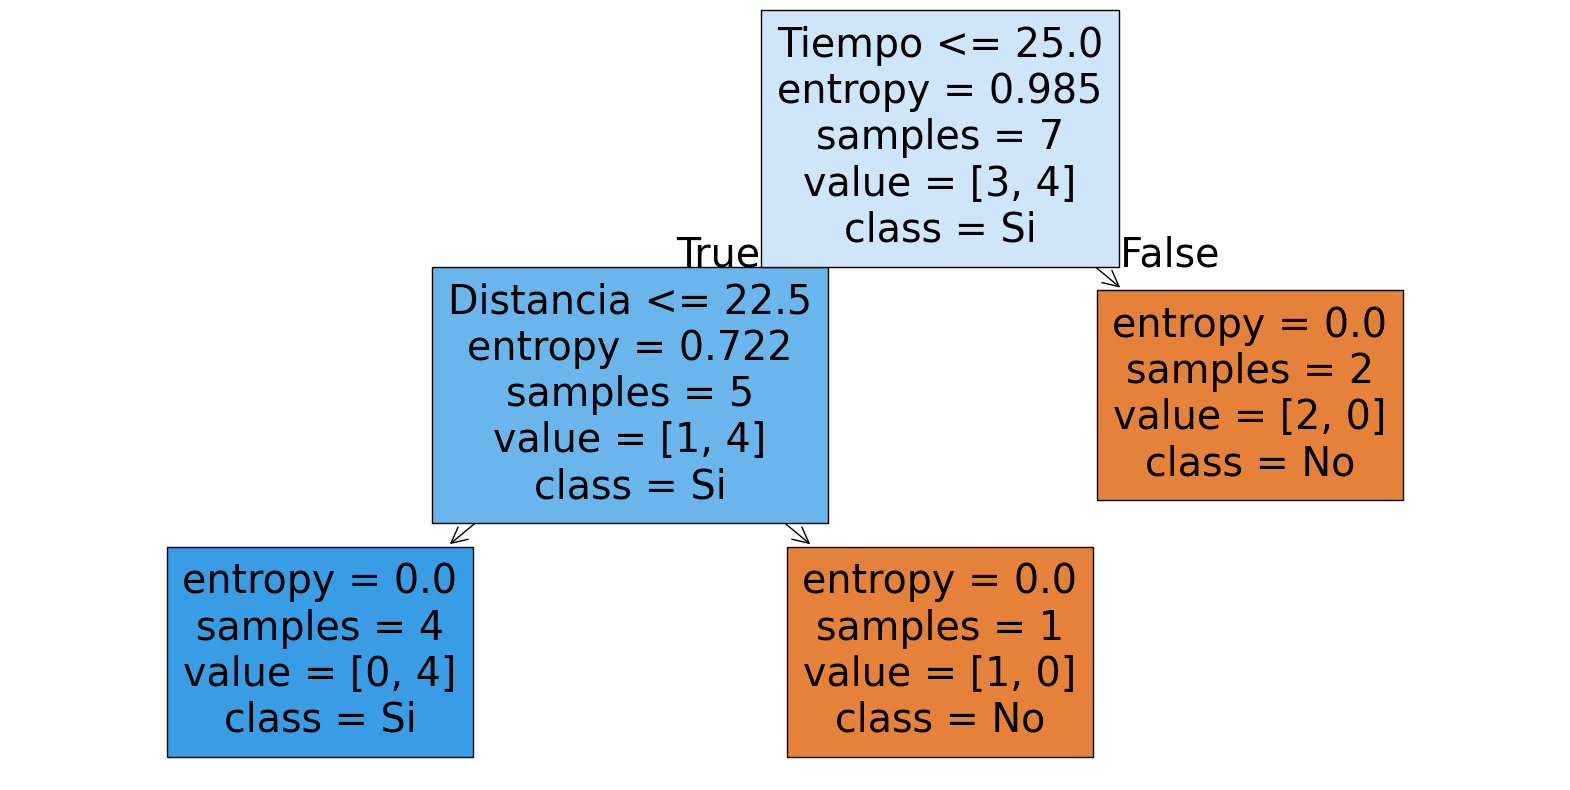

In [21]:
# Imprimir arbol con nombres de columnas
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Si'], filled=True, ax=ax)
plt.show()
